In [595]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

# 1. FFT

Read a row from the image. Collapse RGB into 1 channel. 

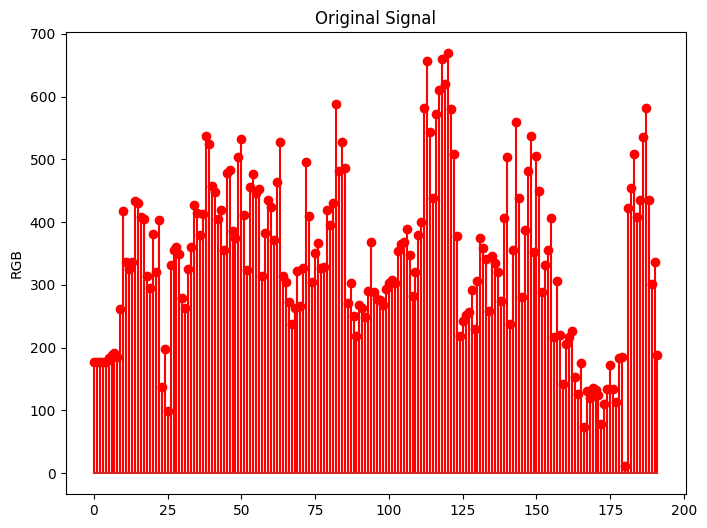

In [596]:
img = cv.imread('dogsmall.jpg')
row_pixels = img[2, :]
row_pixels
sums = np.sum(row_pixels, axis=1)
size = sums.shape[0]
# the indice are [0, 1, ..... 191]
indices = np.arange(size)

# plot the resulst
plt.figure(figsize = (8, 6))
plt.stem(indices, sums, 'r')
plt.ylabel('RGB')
plt.title('Original Signal')
plt.show()

In [597]:
# Numpy FFT and IFFT
np_dft = np.fft.fft(sums)
np_idft = np.fft.ifft(np_dft)

In [598]:
def dft(x):
    N = len(x)
    X = [0] * N
    for k in range(N):
        for n in range(N):
            # X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
            X[k] += x[n] * (math.cos(-2 * math.pi * k * n / N) - 1j * math.sin(2 * math.pi * k * n / N))

    return X

dft_row_pixels = dft(row_pixels)

In [599]:
def idft(X):
    N = len(X)
    x = [0] * N
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * cmath.exp(1j * 2 * math.pi * k * n / N)
        x[n] /= N
    return x

dft_row_pixels[2] *= 0.5
idft_row_pixels = idft(dft_row_pixels)
idft_row_pixels = np.mean(idft_row_pixels, axis=1)

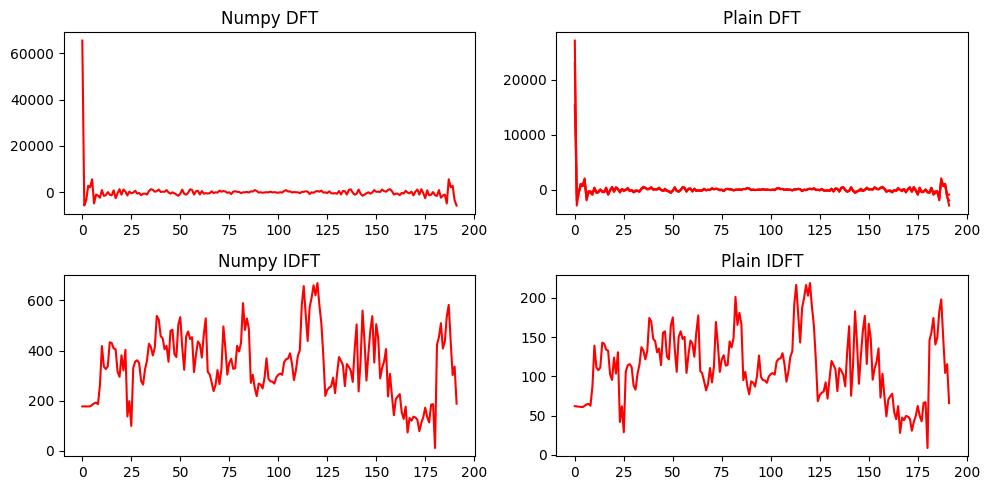

In [600]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs = axs.flatten()

axs[0].plot(indices, np_dft, 'r')
axs[0].set_title('Numpy DFT')

axs[1].plot(indices, dft_row_pixels, 'r')
axs[1].set_title('Plain DFT')

axs[2].plot(indices, np_idft, 'r')
axs[2].set_title('Numpy IDFT')

axs[3].plot(indices, idft_row_pixels, 'r')
axs[3].set_title('Plain IDFT')

plt.tight_layout()
plt.show()

# Q2

In [601]:
#  Generate a random signal
num_components = 5
x = np.linspace(-5, 5, 100)
function = np.zeros_like(x)

for i in range(num_components):
    amplitude = np.random.uniform(0.5, 1.5)
    frequency = np.random.uniform(0.5, 1.5)
    phase = np.random.uniform(0, 2*np.pi)
    function += amplitude * np.sin(2*np.pi*frequency*x + phase)

In [602]:
# Get some random samples from the signal
num_samples = 50
sample_locs = np.random.uniform(-5, 5, num_samples)
samples = function[np.searchsorted(x, sample_locs)]

degree = 3
poly_fit = np.zeros((num_samples, degree+1))
for i in range(degree+1):
    poly_fit[:,i] = sample_locs**i
weights = np.linalg.lstsq(poly_fit, samples, rcond=None)[0]

grid = np.linspace(-5, 5, 100)
fit = np.zeros_like(grid)
for i in range(degree+1):
    fit += weights[i] * grid**i

error = np.linalg.norm(function - fit)
error

15.159817754876544

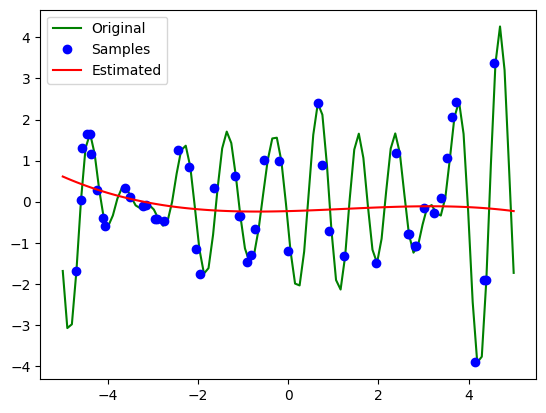

In [603]:
plt.plot(x, function, 'g-', label='Original')
plt.plot(sample_locs, samples, 'bo', label='Samples')
plt.plot(grid, fit, 'r-', label='Estimated')

plt.legend()
plt.show()

# Q3

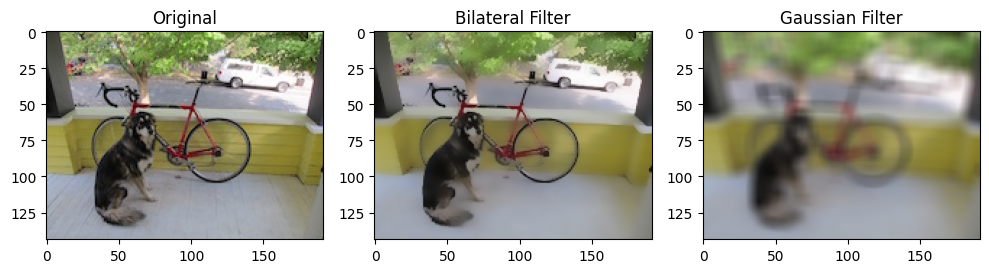

In [604]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('dogsmall.jpg')

# Apply bilateral filter
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

# Apply Gaussian filter
gaussian = cv2.GaussianBlur(img, (9, 9), 75)


# Plot the original, bilateral, and Gaussian filtered images side by side
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
axs[1].set_title('Bilateral Filter')
axs[2].imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
axs[2].set_title('Gaussian Filter')
plt.tight_layout()
plt.show()

It seems like the dog has a significant edge.

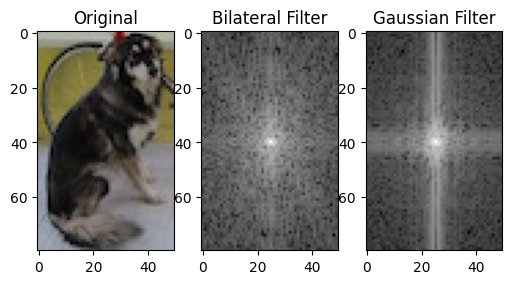

In [605]:
dog_o = img[55:135, 30:80]
dog_b = bilateral[55:135, 30:80]
dog_g = gaussian[55:135, 30:80]

dog_b = cv2.cvtColor(np.float32(dog_b), cv2.COLOR_BGR2GRAY)
dog_g = cv2.cvtColor(np.float32(dog_g), cv2.COLOR_BGR2GRAY)

dog_b = cv.dft(dog_b, flags=cv.DFT_COMPLEX_OUTPUT)
dog_b_shift = np.fft.fftshift(dog_b)
dog_b_fourier = 20*np.log(cv2.magnitude(dog_b_shift[:,:,0], dog_b_shift[:,:,1]))

dog_g = cv.dft(dog_g, flags=cv.DFT_COMPLEX_OUTPUT)
dog_g_shift = np.fft.fftshift(dog_g)
dog_g_fourier = 20*np.log(cv2.magnitude(dog_g_shift[:,:,0], dog_g_shift[:,:,1]))

fig, axs = plt.subplots(1, 3, figsize=(6, 6))
axs[0].imshow(cv2.cvtColor(dog_o, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(dog_b_fourier, cmap='gray')
axs[1].set_title('Bilateral Filter')
axs[2].imshow(dog_g_fourier, cmap='gray')
axs[2].set_title('Gaussian Filter')
plt.show()

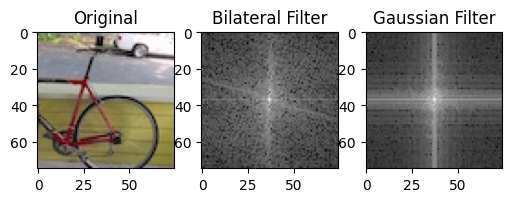

In [606]:
w2_o = img[25:100, 75:150]
w2_b = bilateral[25:100, 75:150]
w2_g = gaussian[25:100, 75:150]

w2_b = cv2.cvtColor(np.float32(w2_b), cv2.COLOR_BGR2GRAY)
w2_g = cv2.cvtColor(np.float32(w2_g), cv2.COLOR_BGR2GRAY)

w2_b = cv.dft(w2_b, flags=cv.DFT_COMPLEX_OUTPUT)
w2_b_shift = np.fft.fftshift(w2_b)
w2_b_fourier = 20*np.log(cv2.magnitude(w2_b_shift[:,:,0], w2_b_shift[:,:,1]))

w2_g = cv.dft(w2_g, flags=cv.DFT_COMPLEX_OUTPUT)
w2_g_shift = np.fft.fftshift(w2_g)
w2_g_fourier = 20*np.log(cv2.magnitude(w2_g_shift[:,:,0], w2_g_shift[:,:,1]))

fig, axs = plt.subplots(1, 3, figsize=(6, 6))
axs[0].imshow(cv2.cvtColor(w2_o, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(w2_b_fourier, cmap='gray')
axs[1].set_title('Bilateral Filter')
axs[2].imshow(w2_g_fourier, cmap='gray')
axs[2].set_title('Gaussian Filter')
plt.show()

You can see the bilateral filter acts different on the edge, so it can preserve some details. The Gaussian takes no difference on the edge, or you can see the fourier specturm is very "uniform" as symmetric.